In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df=pd.read_csv("housing.csv")

In [36]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [38]:
#Checking for null values if any
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [39]:
df.shape

(20640, 10)

In [40]:
#Hence since data is too large and 207 data for bedrooms is null we will drop those records with null values
df.dropna(inplace=True)

In [41]:
df.shape

(20433, 10)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [43]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [44]:
from sklearn.preprocessing import LabelEncoder
ls=LabelEncoder()
df['ocean_proximity']=ls.fit_transform(df['ocean_proximity'])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 1.6 MB


<AxesSubplot: >

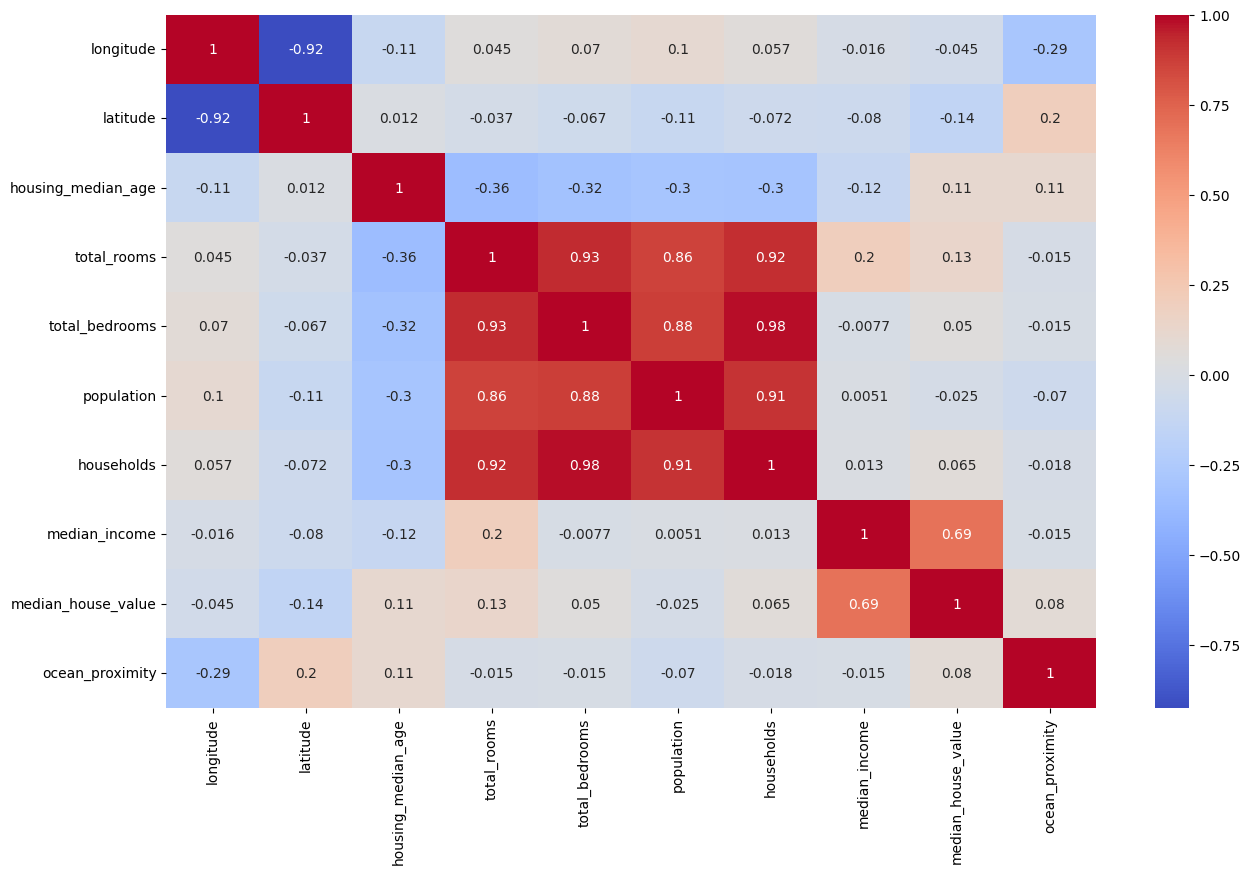

In [46]:
corr=df.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [47]:
# Standardizing the data for better results using Standard Scaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit_transform(df)

array([[-1.32731375,  1.05171726,  0.98216331, ...,  2.34516291,
         2.12881864,  1.29135065],
       [-1.32232256,  1.04235526, -0.60621017, ...,  2.33263161,
         1.31362603,  1.29135065],
       [-1.33230494,  1.03767426,  1.85576873, ...,  1.78293943,
         1.25818254,  1.29135065],
       ...,
       [-0.82320322,  1.77727236, -0.92388486, ..., -1.14317103,
        -0.99247676, -0.11700076],
       [-0.87311515,  1.77727236, -0.84446619, ..., -1.05513604,
        -1.05831591, -0.11700076],
       [-0.83318561,  1.74918635, -1.00330353, ..., -0.78060586,
        -1.01759959, -0.11700076]])

<AxesSubplot: >

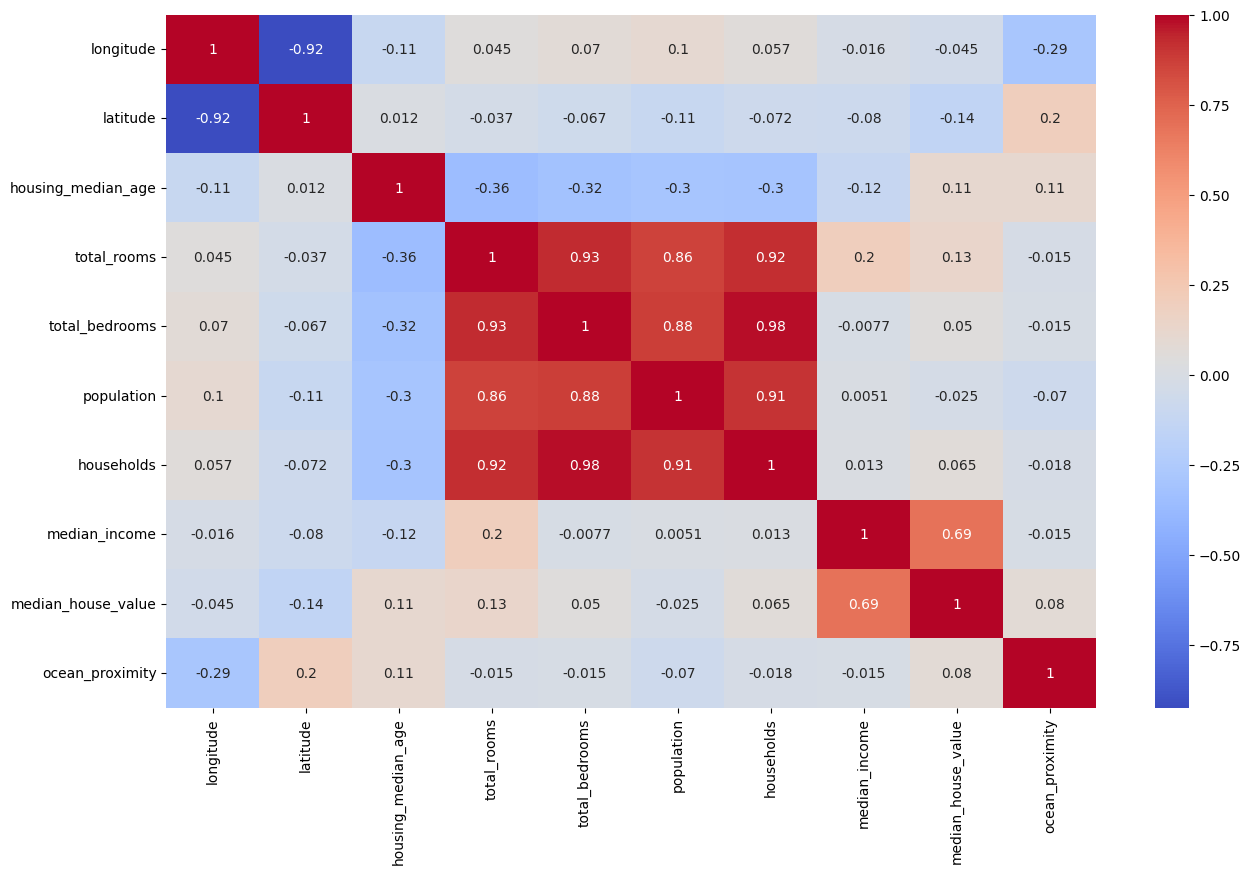

In [48]:
corr=df.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [49]:
# Since the data is cleaned we can add the data into training and testing sets

X=df.drop(columns='median_house_value', axis=1)


In [50]:
Y=df['median_house_value']

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.3,random_state=2)

In [52]:
#Implementing the model using different types of regression algorithms

In [53]:
from sklearn.linear_model import Lasso
ls=Lasso()

In [54]:
ls.fit(x_train,y_train)

Lasso()

In [55]:
ls.score(x_test,y_test)

0.6215409924139226

In [56]:
# Since the accuracy is very low we will try using another algorithms

In [57]:
from sklearn.ensemble import RandomForestRegressor
rs=RandomForestRegressor(n_estimators=10).fit(x_train, y_train)
rs.score(x_test,y_test)

0.7943127969368098

Hence we have implemented the model successfully